<center><h1>Health Care Indexes 2020 Statistical Analysis</h1></center>

<center> <h3> by Jay Agaskar </h3></center>

Health Care Indexes 2020 Statistical Analysis by Jay Agaskar. Dataset available on Kaggle: https://www.kaggle.com/dumbgeek/countries-dataset-2020?select=Quality+of+life+index+by+countries+2020.csv

<h2>1. Data Cleaning</h2>

In [54]:
import pandas as pd

df = pd.read_csv('Quality of life index by countries 2020.csv') 
df.head()

,Country,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index
0,Denmark,192.67,100.88,74.90,80.00,83.00,7.45,28.85,21.33,81.80
1,Switzerland,192.01,119.53,78.40,72.44,122.40,8.68,29.09,22.39,79.24
2,Finland,190.22,99.93,76.68,75.79,70.29,8.35,29.90,11.55,58.87
3,Australia,186.21,107.31,58.64,77.38,73.54,7.52,34.73,23.46,92.70
4,Netherlands,183.67,90.73,72.38,74.65,73.75,7.51,29.43,27.41,87.61


The columns in this dataset were pulled from Numbeo. Quality of Life Index (higher is better) here is an estimation of overall quality of life by using an empirical formula which takes into account purchasing power index, pollution index (lower is better), property price to income ratio (lower is better), cost of living index (lower is better), safety index, health care index, traffic commute time index (lower is better) and climate index.

In [2]:
#there are no elements in the dataframe that are null, so I don't need to fill in any NaN
df.isnull().values.any()

False

<h2>2. Table Statistics</h2>

In [3]:
stat = df.describe()
stat

,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,134.100375,59.751000,61.079125,64.840500,52.461250,13.332875,35.989250,53.227625,77.350250
std,33.921748,26.995155,13.808162,9.840011,19.772413,7.139386,8.236982,20.698200,16.520585
min,55.650000,13.520000,22.510000,42.800000,21.980000,2.790000,20.100000,11.550000,20.220000
25%,106.377500,36.560000,53.177500,56.357500,37.127500,8.830000,29.855000,36.157500,68.705000
50%,132.755000,55.620000,60.055000,66.000000,48.810000,11.680000,34.755000,57.125000,79.215000
75%,162.395000,83.087500,72.075000,72.565000,67.365000,14.935000,39.650000,67.435000,90.612500
max,192.670000,119.530000,88.140000,86.710000,122.400000,47.460000,61.080000,88.370000,99.790000


In [4]:
#transposed table
stat_transpose = stat.transpose()
stat_transpose

,count,mean,std,min,25%,50%,75%,max
Quality of Life Index,80.0,134.100375,33.921748,55.65,106.3775,132.755,162.3950,192.67
Purchasing Power Index,80.0,59.751000,26.995155,13.52,36.5600,55.620,83.0875,119.53
Safety Index,80.0,61.079125,13.808162,22.51,53.1775,60.055,72.0750,88.14
Health Care Index,80.0,64.840500,9.840011,42.80,56.3575,66.000,72.5650,86.71
Cost of Living Index,80.0,52.461250,19.772413,21.98,37.1275,48.810,67.3650,122.40
Property Price to Income Ratio,80.0,13.332875,7.139386,2.79,8.8300,11.680,14.9350,47.46
Traffic Commute Time Index,80.0,35.989250,8.236982,20.10,29.8550,34.755,39.6500,61.08
Pollution Index,80.0,53.227625,20.698200,11.55,36.1575,57.125,67.4350,88.37
Climate Index,80.0,77.350250,16.520585,20.22,68.7050,79.215,90.6125,99.79


From the table, we can see that Purchasing Power, a feature that makes up the Quality of Life, has the highest standard deviation out of the other features. This means that many countries are spread out in term of how powerful their currency is and seems to be the leading factor that affects Quality of Life. Cost of Living seems to have the highest disparity between the 50% percentile and mean which means Cost of Living has increased. Property Price to Income ratio has the lowest standard deviation too 

<h2>3. Data Analysis</h2>

In [36]:
#Correlation matrix

df_matrix = pd.DataFrame(df,columns=['Health Care Index','Purchasing Power Index', 'Safety Index', 'Cost of Living Index', 'Property Price to Income Ratio', 'Pollution Index', 'Climate Index', 'Traffic Commute Time Index'])

corrM = df_matrix.corr()
corrM.style.background_gradient(cmap='coolwarm').set_precision(2)

,Health Care Index,Purchasing Power Index,Safety Index,Cost of Living Index,Property Price to Income Ratio,Pollution Index,Climate Index,Traffic Commute Time Index
Health Care Index,1,0.58,0.36,0.57,-0.058,-0.5,0.063,-0.24
Purchasing Power Index,0.58,1,0.46,0.79,-0.45,-0.69,-0.18,-0.52
Safety Index,0.36,0.46,1,0.43,-0.091,-0.43,-0.26,-0.57
Cost of Living Index,0.57,0.79,0.43,1,-0.22,-0.64,0.037,-0.4
Property Price to Income Ratio,-0.058,-0.45,-0.091,-0.22,1,0.4,0.099,0.49
Pollution Index,-0.5,-0.69,-0.43,-0.64,0.4,1,-0.04,0.6
Climate Index,0.063,-0.18,-0.26,0.037,0.099,-0.04,1,0.063
Traffic Commute Time Index,-0.24,-0.52,-0.57,-0.4,0.49,0.6,0.063,1


Both Purchasing Power Index and Cost of Living Index are strongly positively correlated. This makes sense as Purchasing power increases, Health care increases 0.58 proportionally, for example. On the other hand, Pollution Index is also strongly negatively correlated, as the pollution levels in a country decreases, Health care efforts increase. The rest of the three features are weakly negatively correlated. 
<br>
<br>
Therefore, it would therefore be interesting to analyze the effect of Purchasing Power on Health Care in a country

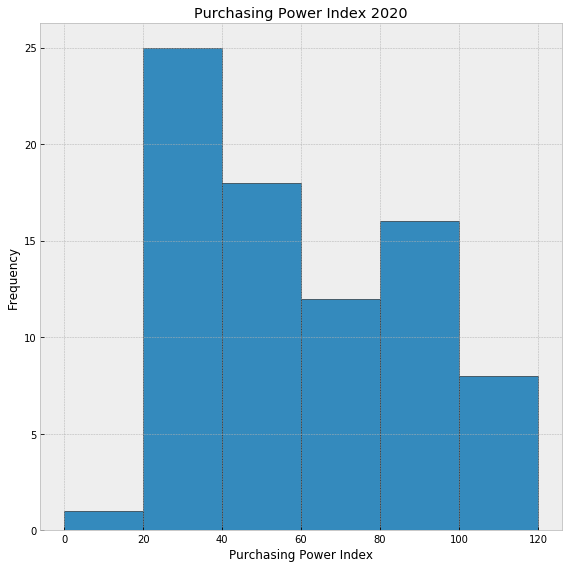

In [11]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8,8))
plt.style.use('bmh')
bins = [0, 20, 40, 60, 80, 100, 120]

hist = df['Purchasing Power Index']
plt.hist(hist, bins=bins, edgecolor='black')

plt.title("Purchasing Power Index 2020")
plt.xlabel("Purchasing Power Index")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


In this Purchasing Power histogram, the majority of countries (25) have a purchasing power index between 20 to 40 which is in the 25th percentile. Purchasing Power has a high standard deviation of 26 which indicates a wide spread and is illustrated here with the majority being between 20 to 60 and then 80 to 100. Peaks are not distributed around the mean. 

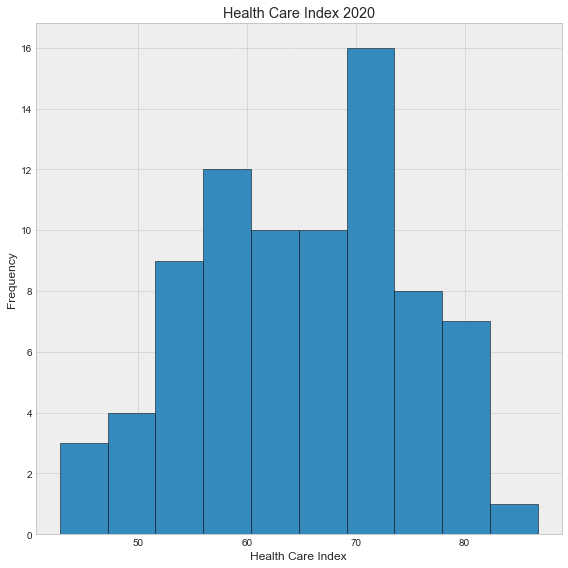

In [24]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8,8))
plt.style.use('bmh')

hist = df['Health Care Index']
plt.hist(hist, edgecolor='black')

plt.title("Health Care Index 2020")
plt.xlabel("Health Care Index")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


Alternatively, in this Health Care Index, the distribution is much more normalized around the center. The majority of countries have a Health Care Index higher than the average between 70-75 which is in the 75th percentile. Health Care has the third lowest standard deviation, making this feature normally distributed. 

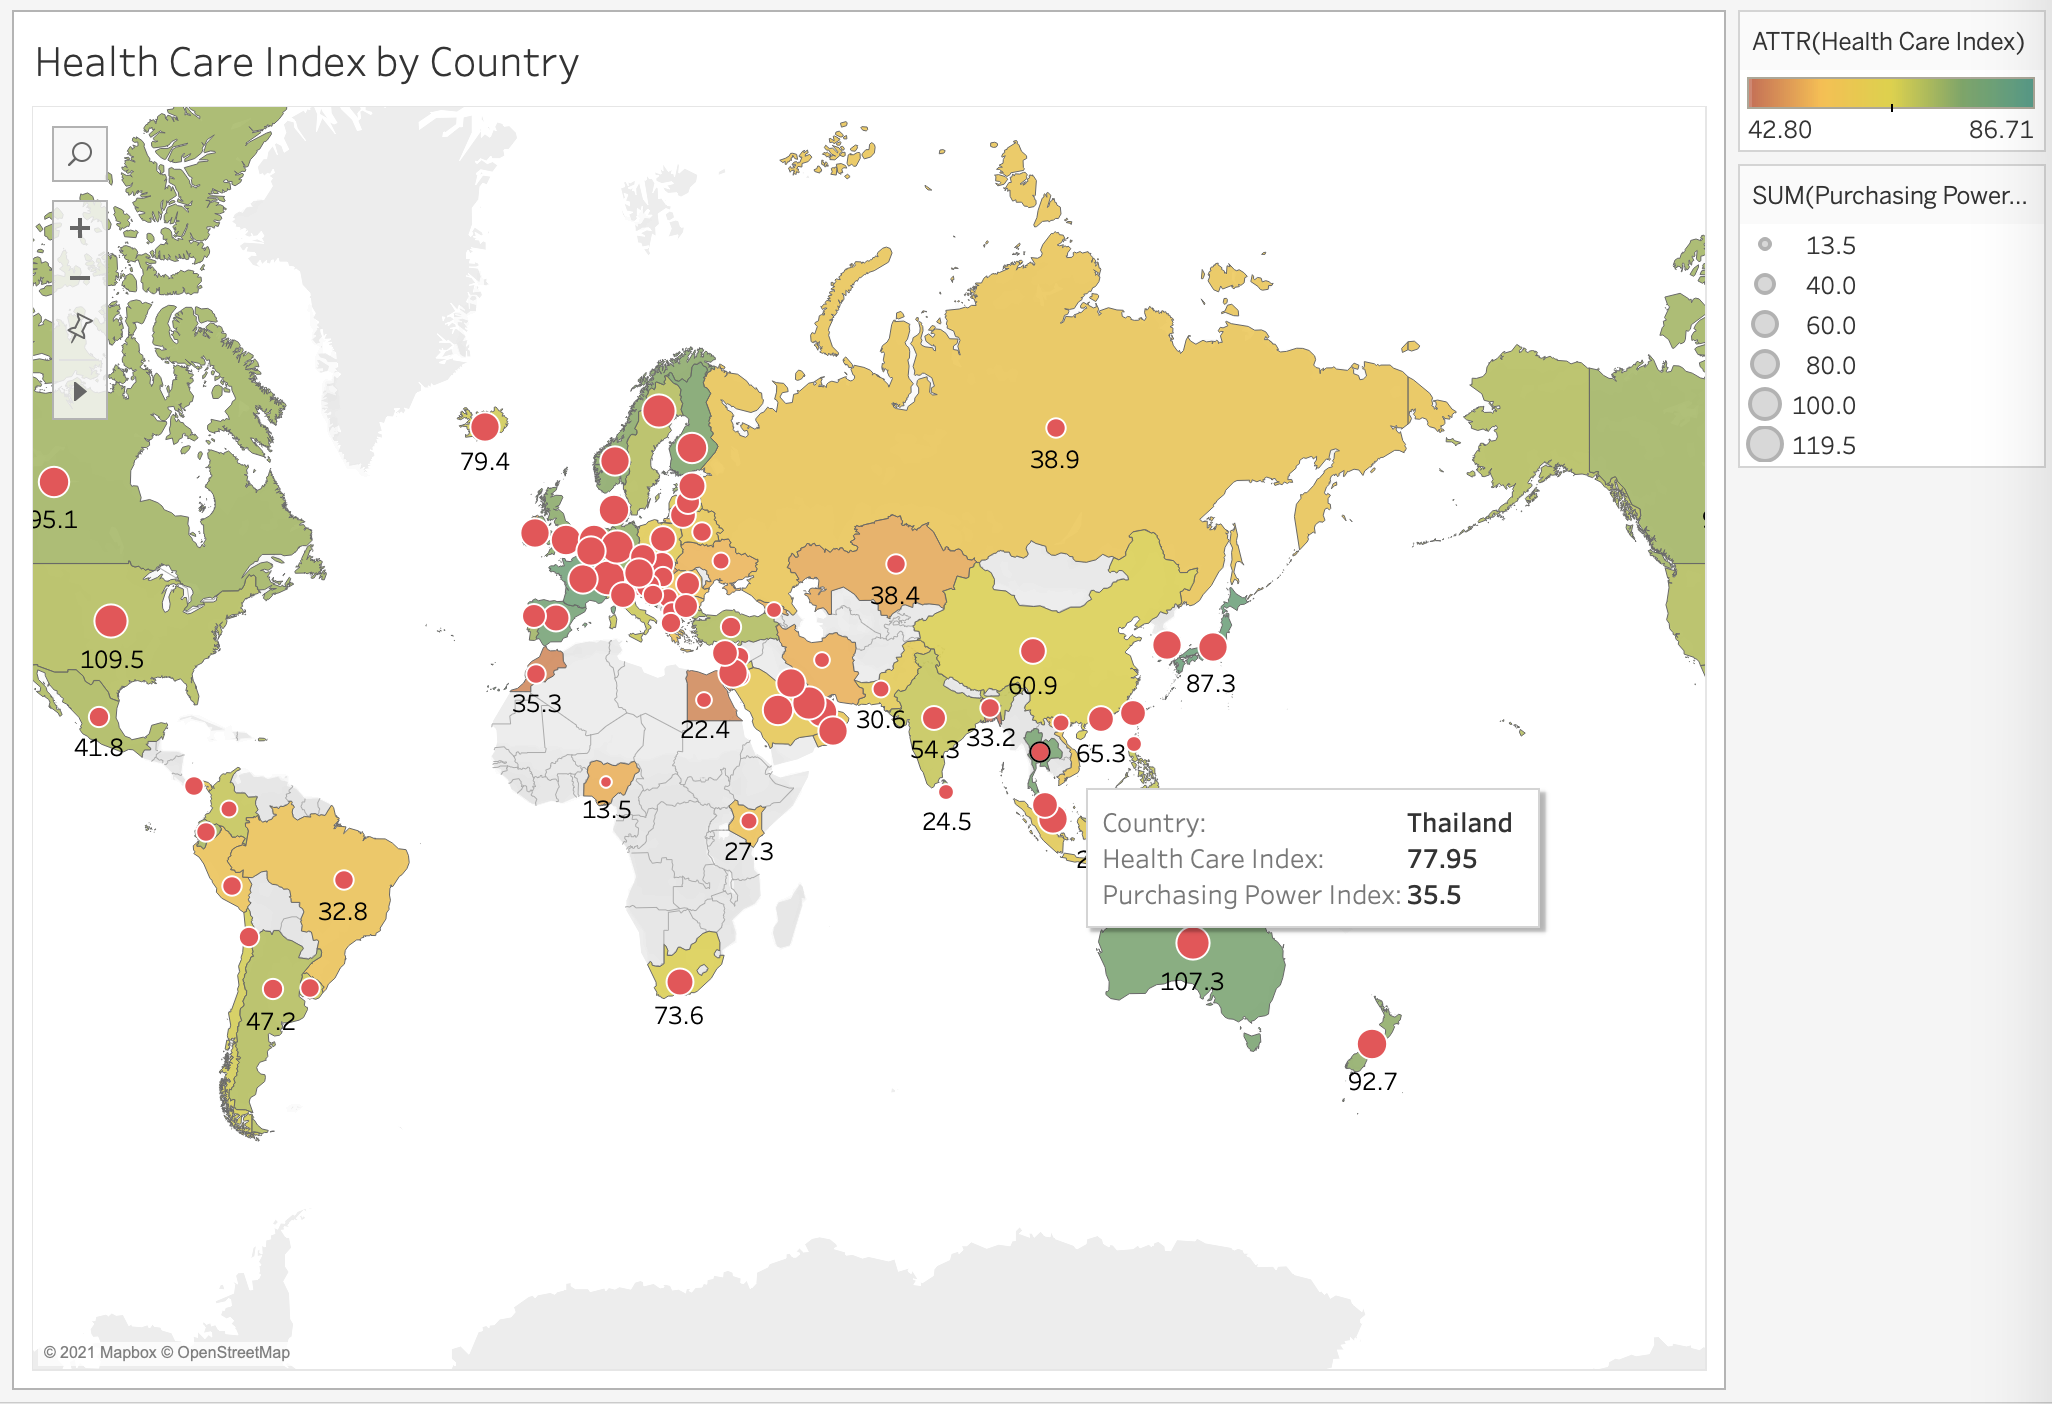

In [42]:
from IPython.display import Image
Image("tableaulabel.png")

The above screenshot is a Tableau visualization of Health Care Index on the world map. Shown in an example with Thailand, you are able to hover over countries to view details. Countries with a green color are in the 75th percentile with the highest Health Care Indexes. It's clear that North America, Australia & New Zealand, and Europe are amongst the highest Health Care Indexes. Red circles represent the amount of Purchasing Power, with larger sizes as having more Purchasing Power. At a first look, these two features may be correlated, as seen with Australia and Europe. However, the Middle East's cluster has high Purchasing Power countries that are not high in Health Care. This  suggests a different pattern of GDP spending with Health Care depending on the region.   

Let's declare a hypothesis/problem statement before further analysis. I want to see the Health Care Index for countries and their purchasing power, whether a country with higher purchasing power will have better access to health care for its citizens. My null hypothesis for this report will be that Purchasing Power does determine a county's Health Care. Countries with a less powerful currency would not have high Health Care Index. My two-sided alternative hypothesis for this report is that Purchasing Power does not affect a country's Health Care Index. 

<h2>4. Preliminary OLS Regression</h2>

In [55]:
#OLS Regression for

import statsmodels.api as sm
import numpy as np

X = df["Purchasing Power Index"]
y = df["Health Care Index"]
X = sm.add_constant(X) #add an intercept beta0

model = sm.OLS(y, X).fit(cov_type='HC1') 
#fit MacKinnon and White’s heteroskedasticity-robust standard errors
predictions = model.predict(X) #Assign prediction to model

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Health Care Index   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     47.86
Date:                Sun, 17 Jan 2021   Prob (F-statistic):           1.13e-09
Time:                        14:29:25   Log-Likelihood:                -279.26
No. Observations:                  80   AIC:                             562.5
Df Residuals:                      78   BIC:                             567.3
Df Model:                           1                                         
Covariance Type:                  HC1                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     52.1263      2.145     24.305      0.000      47.923      56.330
Purchasing Power Index     0.2128      0.031      6.918      0.000       0.153       0.273
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.121
Skew:                           0.041   Prob(JB):                        0.941
Kurtosis:                       2.829   Cond. No.                         160.
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In running the OLS Regression, I am fitting it with the Heteroskedasticity-robust Standard Errors. From the results table, an R-Squared score of 0.34 indicates that the model explains 34% of the variability of the response data around the mean. The beta 1 hat predictor is 0.21 which means that as the Purchasing Power index increases by 1 unit, the Health Care index increases by just 0.21 units. Finally, at a 5% level, Purchasing Power is <b>statistically</b> significant because its very small p-value is less than 0.05. We can confidently reject the null hypothesis that Purchasing Power does not infact have an effect on a country's level of Health Care.
<br><br>
Additionally, In terms of broader economics, the Purchasing Power coefficient is also not <b>practically</b> significant on the Health Care Index. With a large increase in Purchasing Power, ceteris paribus, for example a 20 unit increase in the index would contribute to increase in Health Care for that country by just 4.25 units. This is still lower than Health Care Index's standard deviation. It is not an economically significant feature and even with a large increase of a coutnry's purchasing power, health care does not improve significantly and would still remain close to the mean.  

In [60]:
# calculating fitted values: 

df_fitted = pd.DataFrame() 
df_fitted['Fitted value'] = predictions
df_fitted['Health Care Index'] = df['Health Care Index']
df_fitted['Purchasing Power Index'] = df['Purchasing Power Index']
df_fitted['Residual'] = df['Health Care Index'] - df_fitted['Fitted value']
df_fitted


,Fitted value,Health Care Index,Purchasing Power Index,Residual
0,73.592215,80.00,100.88,6.407785
1,77.560691,72.44,119.53,-5.120691
2,73.390067,75.79,99.93,2.399933
3,74.960435,77.38,107.31,2.419565
4,71.432427,74.65,90.73,3.217573
...,...,...,...,...
75,57.328908,72.53,24.45,15.201092
76,56.954403,51.70,22.69,-5.254403
77,57.939606,55.59,27.32,-2.349606
78,59.192921,42.80,33.21,-16.392921


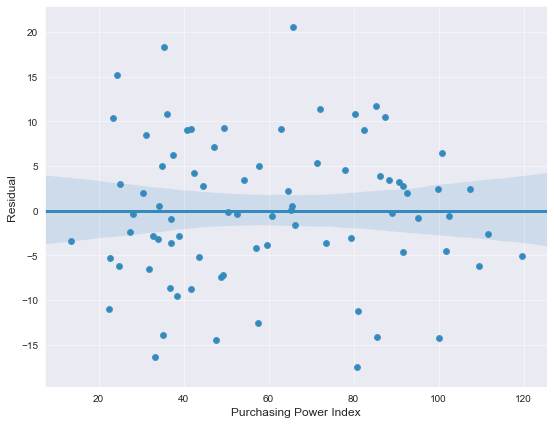

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 7))

sns.set_style("darkgrid")

new_graph = sns.scatterplot(x="Purchasing Power Index", y="Residual", data=df_fitted)

new_graph.set_ylabel("Residual")
new_graph.set_xlabel("Purchasing Power Index")

ax = sns.regplot(x="Purchasing Power Index", y="Residual", data=df_fitted)

The above scatter graph displays a horizontal regression line and residuals that are fairly random. Residuals however, show a weak heteroskedastic trend seen from the regression plot; the dispersion of residual points aren't spread out in parallel over the range of purchasing power and are initially disperse then converge, then spread out again. The conditional variance function of error term is roughly the same for the extremes x=20 and x=120. Because of this, there is not much room for tilt-ability and a small chance that the beta 1 hat heteroskedastic-robust estimator is further out from the true population. 

<h2>4. Logistic Regression, OVB, and Multicollinearity</h2>

<Figure size 1080x1080 with 0 Axes>

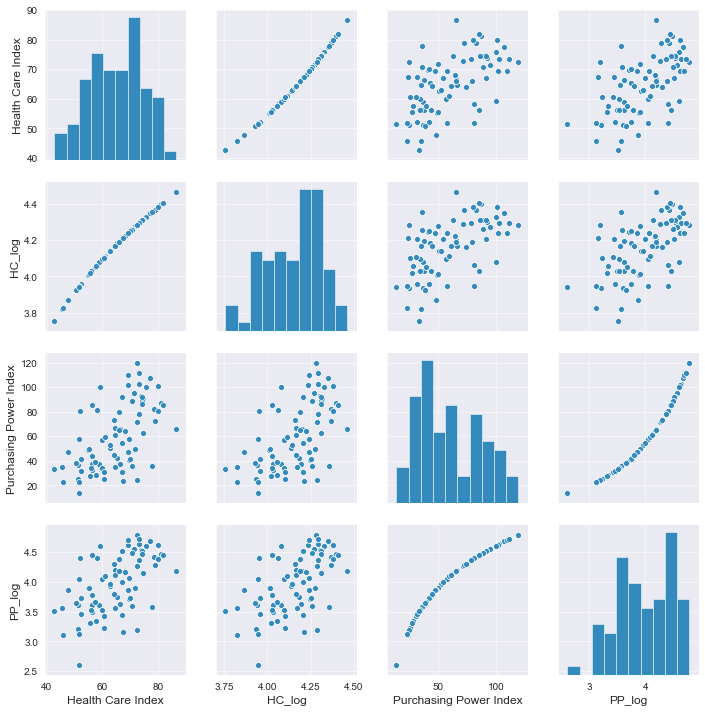

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(15, 15))

sns.set_style("darkgrid")

df_log = pd.DataFrame()
df_log['Health Care Index'] = df['Health Care Index']
df_log['HC_log'] = np.log(df['Health Care Index'])
df_log['Purchasing Power Index'] = df['Purchasing Power Index']
df_log['PP_log'] = np.log(df['Purchasing Power Index'])

sns.pairplot(df_log)

In [64]:
from statsmodels.iolib.summary2 import summary_col
from statsmodels.stats.outliers_influence import variance_inflation_factor

df_log['const'] = 1
df_log['Safety Index'] = df['Safety Index']
df_log['Cost of Living Index'] = df['Cost of Living Index']
df_log['Pollution Index'] = df['Pollution Index']

# Create lists of variables to be used in each regression
X1 = ['const', 'PP_log']
X2 = ['const', 'Purchasing Power Index']
X3 = ['const', 'Purchasing Power Index', 'Safety Index']
X4 = ['const', 'Purchasing Power Index', 'Safety Index', 'Cost of Living Index']
X5 = ['const', 'Purchasing Power Index', 'Safety Index', 'Cost of Living Index', 'Pollution Index']

# Estimate an OLS regression for each set of variables
# Fit heteroskedatisticy on all regressions
reg1 = sm.OLS(df_log['HC_log'], df_log[X1]).fit(cov_type='HC1')
reg2 = sm.OLS(df_log['Health Care Index'], df_log[X2]).fit(cov_type='HC1')
reg3 = sm.OLS(df_log['Health Care Index'], df_log[X3]).fit(cov_type='HC1')
reg4 = sm.OLS(df_log['Health Care Index'], df_log[X4]).fit(cov_type='HC1')
reg5 = sm.OLS(df_log['Health Care Index'], df_log[X5]).fit(cov_type='HC1')

info_dict={'No. Observations' : lambda x: f"{int(x.nobs):d}",
           'R-squared' : lambda x: f"{x.rsquared:.3f}",
           'Adj R-squared' : lambda x: f"{x.rsquared_adj:.3f}"}

results_table = summary_col(results=[reg1,reg2,reg3, reg4, reg5],
                            float_format='%0.5f',
                            stars = True,
                            model_names=['Model 1',
                                         'Model 2',
                                         'Model 3',
                                         'Model 4',
                                         'Model 5'],
                            info_dict=info_dict,
                            regressor_order=['const',
                                             'PP_log',
                                             'Purchasing Power Index',
                                             'Safety Index',
                                             'Cost of Living Index',
                                             'Pollution Index'])

results_table.add_title('Side-by-side table of Regression results')

print(results_table)

# print variance inflation factor to refer
print("\nVIF:")
v1 = reg1.model.exog
vif1 = [variance_inflation_factor(v1, i) for i in range(v1.shape[1])]
v2 = reg2.model.exog
vif2 = [variance_inflation_factor(v2, i) for i in range(v2.shape[1])]
v3 = reg3.model.exog
vif3 = [variance_inflation_factor(v3, i) for i in range(v3.shape[1])]
v4 = reg4.model.exog
vif4 = [variance_inflation_factor(v4, i) for i in range(v4.shape[1])]
v5 = reg5.model.exog
vif5 = [variance_inflation_factor(v5, i) for i in range(v5.shape[1])]
print("Model 1 ",vif1)
print("Model 2 ",vif2)
print("Model 3 ",vif3)
print("Model 4 ",vif4)
print("Model 5 ",vif5)

                    Side-by-side table of Regression results
                        Model 1     Model 2     Model 3     Model 4     Model 5  
---------------------------------------------------------------------------------
const                  3.41630*** 52.12627*** 48.36188*** 46.57084*** 52.75398***
                       (0.11544)  (2.14466)   (3.82178)   (4.03500)   (7.16193)  
PP_log                 0.18690***                                                
                       (0.02792)                                                 
Purchasing Power Index            0.21279***  0.19374***  0.11638**   0.09541*   
                                  (0.03076)   (0.03398)   (0.04825)   (0.05114)  
Safety Index                                  0.08027     0.06442     0.05224    
                                              (0.06895)   (0.06857)   (0.07165)  
Cost of Living Index                                      0.14071*    0.12469*   
                                     

In the log-log regression for model 1, the regression coefficient estimate is in terms of percent elasticity for the effect of log purchasing power on log health care. As Purchasing Power Index in a country goes up by 1%, then Health Care Index will go up by 0.19%. A log regression doesn't make much sense practially when dealing with indexes, so it is not an ideal model to interpet and move forwards with. The rest of the models are linear-linear.

Model 2 is a linear-linear regression where the coefficient estimate is semi-elastic. With an additional 1 unit of Purchasing Power in a country, the expected Health Care Index will increase by 0.21. Both models are statistically significant at the 1% level, so we can confidently reject the null hypothesis. Similar to the initial OLS Regression of model 2, model 1 is also not practically significant. 

Initially comparing between the models, the best fit is model 5 because it has the highest R-squared and Adjusted R-squared value, indicating that values from these regressors are better at predicting the estimated dependent variable in the sample. However, adding more regressors will increase the amount of variance explained so Model 5 can result in overfitting with an R-Squared of 0.389. 

In Model 3, the linear-linear regression includes a control variable. The beta 1 hat coefficient states that for each 1 unit increase of Purchasing Power Index, Health Care Index is expected to increase by 0.19; 0.02 lower than model 2, ceteris paribus. The beta 2 hat coefficient states that for each 1 unit increase of Safety Index, Health Care is expected to increase by 0.08, ceteris paribus. 

Comparing between model 2 and model 3, model 2 suffers from omitted variable bias becuase it is a single variate, not controlling for any other factors. The software is exploiting variability in Purchasing Power and will attribute all the variability as the effect of education on Health Care Inndex solely. This means that model 2 is picking up and comparing just between countries with a weak currency to countries with a strong currency without controlling for how safe a country is, for example.

It can be seen that there is no Omitted Variable Bias in model 2 because it is over-estimating the ceteris paribus effect of Purchasing Power on Health Care, ceteris paribus. This is evidenced by the beta 1 coefficient in model 3 being is smaller than in model 2. However, the beta 2 coefficient on Safety is NOT statistically significant, so this regressor has an negligible effect on Health Care. The correlation between the error term u (which includes other omitted variables that have an effect on Health Care and are correlated with Purchasing Power), and x1 is not equal to 0 making the beta1 hat biased and OVB is present. 

In Model 3, there is a much high standard error on the new regressor Safety because of multicollinearity, meaning that the Safety and Purchasing Power regressors are correlated. R-Squared increased by just 0.01 which says that x1 and x2 regressors have predictive powers in relation with each other, but are not too strong. 

Model 1 states that is statistically significant at the 1% significance level, it does not necessairly imply isolated pure causal effect because p-values are high; there is a high possibility of observing a beta 1 hat at an extreme value. This is because of a high collinearity and a small number of obervations by which to estimate beta 1 hats in a ceteris paribus setting. As a result, there is going to be a very large VIF of 68.  

Coefficient on Purchasing Power from model 2 to 3 changed very little because there isn't a high multicollinearity with the Safety regressor. The beta 1 coefficient wasn't very sensitive to change. Because we are over-estimating the effect of Purchasing Power on Health Care, there is a larger sample size as more regressors are added to get an OVB free model. Therefore, because the other control variables were already introduced and the data is not very collinear, Purchasing Power's estimated beta coefficient is unbiased and is likely to be centered at the true population effect.

In conclusion, I can be more confident that my beta 1 is centered at the true value in Model 3 because of the decrease in coefficients and more dispersion. I can say that Purchasing Power and Safety are weakly collinear with each other. Therefore, Model 3 will be a better model than 2 for identifying the causal effect because it is OVB free. 

In regards to VIF from the results, Model 5 had the highest VIF of 68 which suggests an inflation of standard errors. Therefore, there is a trade-off between bias and variance in choosing an appropriate model. Amongst these three, the one I would choose is Model 3. However, I also have to keep in mind that there is high multicollinearity present and that there will be larger VIF as a result. So my beta1 hats are going to not be precise, more variable, and I won't be so confident. However, in the up side, as new regressors are added which were previously included in the error term, if density and urban both have a high explanatory power then some of the weight of the VIF can be lifted because the new regression error term's variability is reduced.